# Задание 1.

Поработаем с датасетом Black Friday. Есть его описание:

Description

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [94]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [95]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [96]:
data = data.fillna(0)

In [97]:
data.shape

(537577, 12)

In [98]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

Выведите на экран тип каждой колонки в таблице.

In [99]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените значение 'M' на 1, а 'F' на 0.

In [100]:
print(data['Gender'].unique())
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)
print(data['Gender'].unique())
data.head()

['F' 'M']
[0 1]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969


Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [101]:
print(data['Age'].unique())

def map_age(age):
    if age != '55+':
        return int(age[0])
    else:
        return 6
    
data['Age'] = data['Age'].apply(map_age)
print(data['Age'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[0 6 2 4 5 3 1]


Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [102]:
print(data['City_Category'].unique())

new_cols = pd.get_dummies(data.City_Category, prefix='prefix', drop_first=True)
data.drop('City_Category', axis=1, inplace=True)
data = data.join(new_cols)
print(data.head())

['A' 'C' 'B']
   User_ID Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  1000001  P00069042       0    0          10                          2   
1  1000001  P00248942       0    0          10                          2   
2  1000001  P00087842       0    0          10                          2   
3  1000001  P00085442       0    0          10                          2   
4  1000002  P00285442       1    6          16                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 0.0                 0.0   
1               0                   1                 6.0                14.0   
2               0                  12                 0.0                 0.0   
3               0                  12                14.0                 0.0   
4               0                   8                 0.0                 0.0   

   Purchase  prefix_B  prefix_C  
0 

Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [103]:
print(data['Stay_In_Current_City_Years'].unique())

def map_stay(years):
    if years[0] == '4+':
        return 4
    else:
        return int(years[0])
    
data['Stay_In_Current_City_Years'] = \
    data['Stay_In_Current_City_Years'].apply(map_stay)
print(data['Stay_In_Current_City_Years'].unique())

['2' '4+' '3' '1' '0']
[2 4 3 1 0]


In [104]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,prefix_B,prefix_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,7969,0,1


Удалим столбцы User_ID и Product_ID.

In [105]:
data.drop('User_ID', axis=1, inplace=True)
data.drop('Product_ID', axis=1, inplace=True)

In [106]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,prefix_B,prefix_C
0,0,0,10,2,0,3,0.0,0.0,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,0.0,0.0,1422,0,0
3,0,0,10,2,0,12,14.0,0.0,1057,0,0
4,1,6,16,4,0,8,0.0,0.0,7969,0,1


# Исследование данных

1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.

2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.

3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму для каждой закодированной категории.

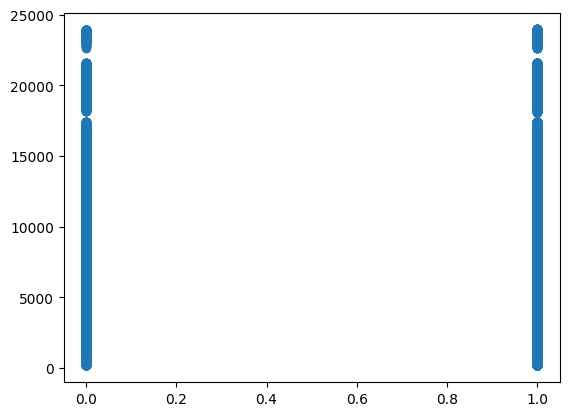

In [109]:
plt.scatter(data['Gender'], data['Purchase'])

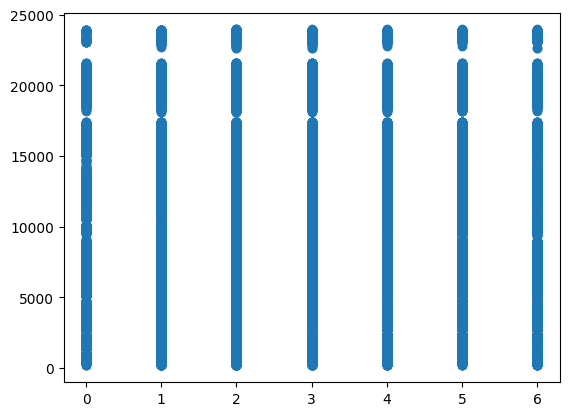

In [112]:
plt.scatter(data['Age'], data['Purchase'])

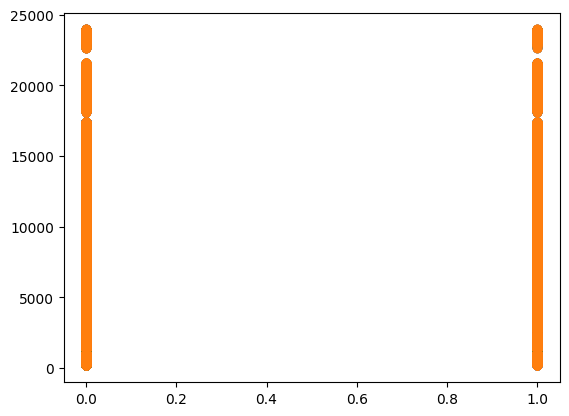

In [116]:
plt.scatter(data['prefix_B'], data['Purchase'])
plt.scatter(data['prefix_C'], data['Purchase'])

Нарисуйте матрицу корреляций признаков.

<AxesSubplot:>

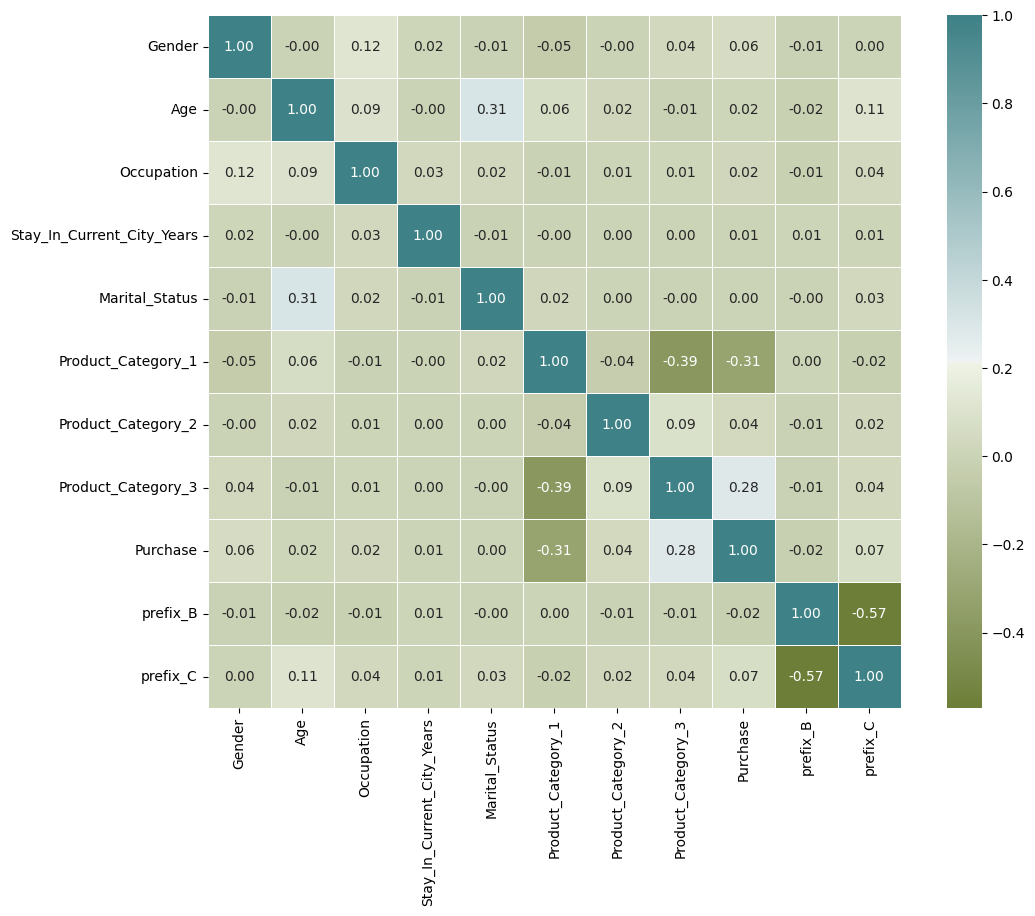

In [117]:
import seaborn as sns

plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

# Построение модели

Применим к нашим данным масштабирование: для того, чтобы модель лучше училась, будет неплохо привести все признаки к одному масштабу, иначе могут возникнуть проблемы с коэффициентами: если какой-то признак принимает очень большие значения, а другой - маленькие, модели будет сложно корректно подобрать веса. 

Стандартная формула для масштабирования:

$\hat{x} = \frac{x - \mu}{\sigma}$

In [118]:
X = data.copy()

y = data['Purchase']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)
print(ypred_test)

[9870. 8006. 5379. ... 7507. 4201. 5295.]


In [119]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(1.0, 1.0)

In [120]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,-1.237792e-12
1,Age,0.000000e+00
2,Occupation,1.818989e-12
3,Stay_In_Current_City_Years,2.842171e-13
4,Marital_Status,8.242296e-13
5,Product_Category_1,1.250555e-12
6,Product_Category_2,3.907985e-14
7,Product_Category_3,-1.136868e-12
8,Purchase,4.979211e+03
9,prefix_B,-1.350031e-12


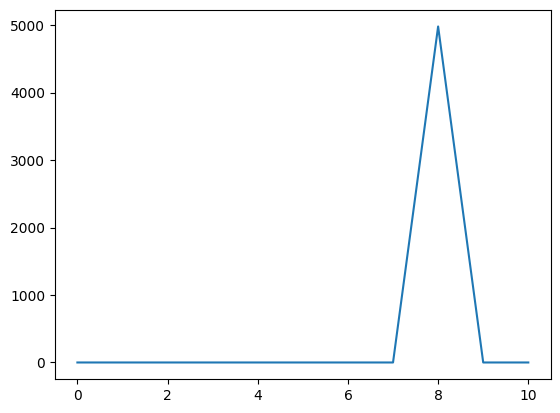

In [122]:
plt.plot(regressor.coef_)

Добавим L1 регуляризацию.

In [123]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.9999959665288067 100.36288915977656
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4969.21091717   -0.
    0.        ] 



Посмотрим, что происходит при разных значениях параметра регуляризации $\alpha$

In [124]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.9999999995741026 0.010597397744882676
[   0.           -0.            0.            0.           -0.
   -0.            0.            0.         4979.10815979   -0.
    0.        ] 

alpha=25.1
Scores: 0.9999745887281353 632.2962379954573
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4954.11091717   -0.
    0.        ] 

alpha=50.1
Scores: 0.9998987594697019 2519.118554198885
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4929.11091717   -0.
    0.        ] 

alpha=75.1
Scores: 0.9997725118213527 5660.476984899336
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4904.11091717   -0.
    0.        ] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [125]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [126]:
lasso_cv.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  1., -0.,  0.])

In [127]:
lasso_cv.alpha_

0.1

Обучим модель с найденным параметром регуляризации $\alpha$

In [128]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.9999999995741026 0.9999999995741026


Добавим L2 регуляризацию.

In [129]:
from sklearn.linear_model import Ridge

for a in np.arange(-10,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=-10.0
Scores: 0.9999999993736516 0.015585121753050291
[-5.64750490e-03 -3.62792778e-03 -1.04517315e-03 -3.75836325e-04
  5.73869084e-04  3.21320893e-02 -1.40796023e-03 -2.49188488e-02
  4.97934490e+03 -1.90919215e-03 -8.38069587e-03]
alpha=-7.5
Scores: 0.9999999996476842 0.008766501380307577
[-4.23557986e-03 -2.72090436e-03 -7.83876245e-04 -2.81874996e-04
  4.30390534e-04  2.40987735e-02 -1.05596794e-03 -1.86889362e-02
  4.97931140e+03 -1.43184433e-03 -6.28542319e-03]
alpha=-5.0
Scores: 0.9999999998434175 0.0038961652344502644
[-2.82368736e-03 -1.81390859e-03 -5.22581749e-04 -1.87915165e-04
  2.86919503e-04  1.60656534e-02 -7.03977140e-04 -1.24591572e-02
  4.97927791e+03 -9.54529694e-04 -4.19021632e-03]
alpha=-2.5
Scores: 0.999999999960855 0.0009740269085501833
[-1.41182741e-03 -9.06940470e-04 -2.61289667e-04 -9.39568330e-05
  1.43455992e-04  8.03272885e-03 -3.51987827e-04 -6.22951181e-03
  4.97924441e+03 -4.77248253e-04 -2.09507526e-03]
alpha=0.0
Scores: 1.0 9.44553537746571e-24

**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [130]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [131]:
ridge_cv.alpha_

0.010969857978923836

In [132]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.9999999997814315 0.9999999997816453


Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio. Используйте ElasticNet со значениями параметров alpha и l1_ratio равными 0.5.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [133]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=0.5, l1_ratio=0.5)
regr.fit(Xtrain, ytrain)

ypred4_train = regr.predict(Xtrain)
ypred4_test = regr.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred4_train), r2_score(ytest,ypred4_test))

Scores: 0.957902440208933 0.9578585186178519


### Посмотрим на веса, которые присвоила линейная регрессия признакам (regressor.coef_).

In [134]:
#your code here
regressor3.coef_

array([ 0.00000000e+00, -1.03819157e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.95734535e-02,  2.47390239e-03, -4.03015869e-02,
        4.97920453e+03, -7.33706987e-02, -2.97128903e-02])

Можно записать эти веса в таблицу рядом с названиями признаков (для удобства).

In [135]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

,0,0
0,Gender,0.000000
1,Age,-0.001038
2,Occupation,0.000000
3,Stay_In_Current_City_Years,0.000000
4,Marital_Status,-0.000000
5,Product_Category_1,-0.029573
6,Product_Category_2,0.002474
7,Product_Category_3,-0.040302
8,Purchase,4979.204529
9,prefix_B,-0.073371


In [136]:
len(data),len(Xtest)

(537577, 107516)

# Задание 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [ ]:
#your code here

# Задание 3. 

Поработайте с датасетом House Sales in King County. Обратите внимание, что не все признаки в датасете полезны. Целевая переменная - очевидно, price. 

In [ ]:
#your code here